Text(0.5, 1.0, '16 colored image')

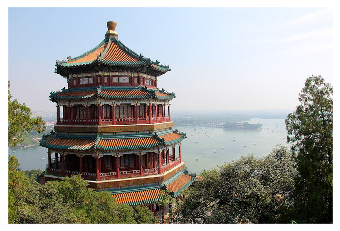

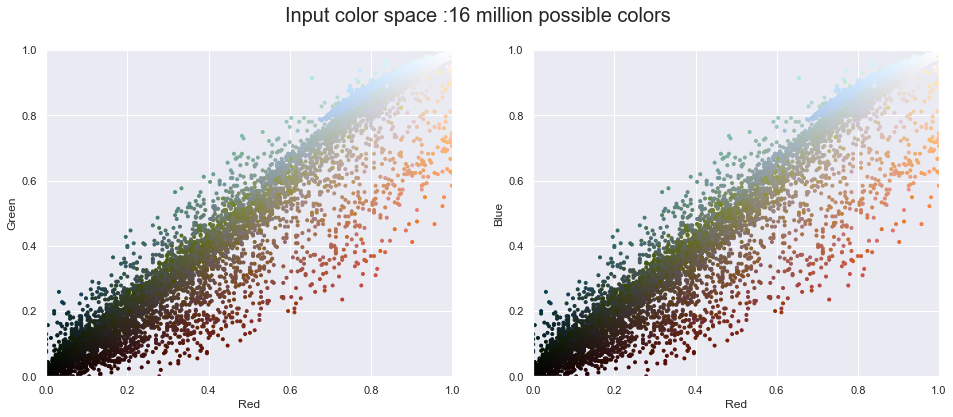

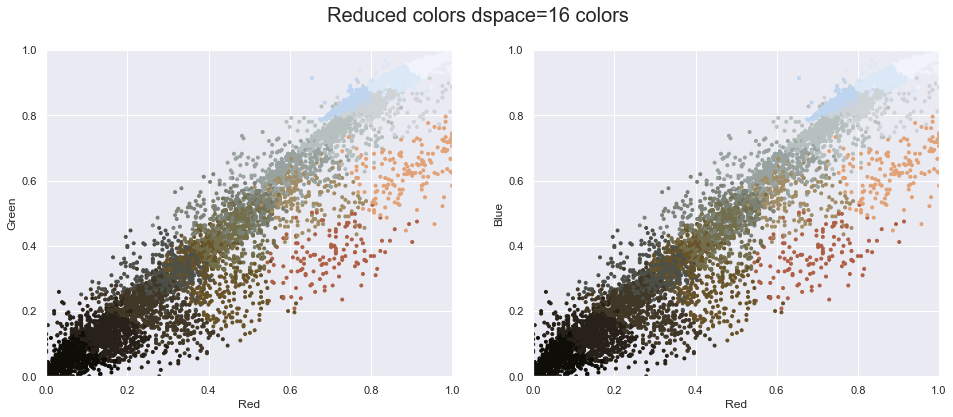

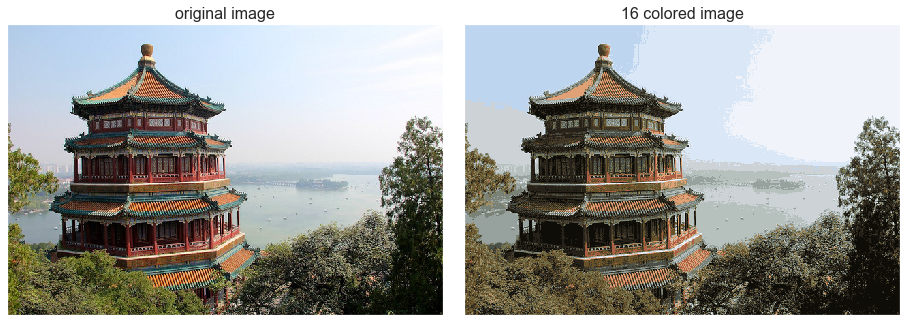

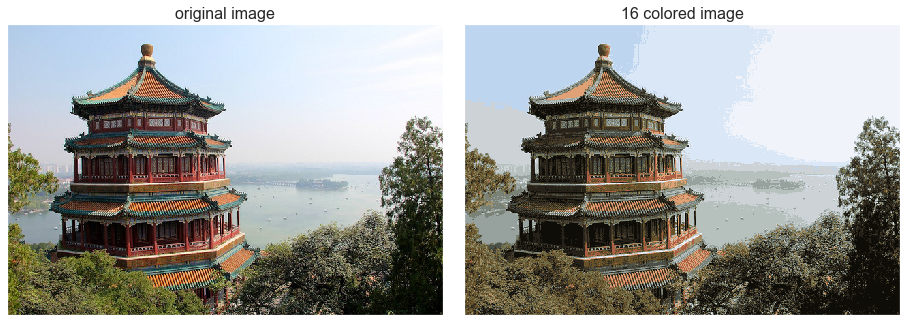

In [1]:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns ; sns.set()
    import numpy as np
    
    from sklearn.datasets import load_sample_image
    china=load_sample_image("china.jpg")
    ax=plt.axes(xticks=[],yticks=[])# to shoe the values on x axis and y axis 
    ax.imshow(china);
    
    data=china/255.0
    data =data.reshape(427*640,3) 

    # CONVERT 3D IMAGE TO A 2D IMAGE, WITH 3 COLORS 
    data.shape

    def plot_pixels(data,title,colors=None,N=10000):
        if colors is None:
                colors=data
        # choose a random subset
        rng=np.random.RandomState(0)
        i=rng.permutation(data.shape[0])[:N]
        colors=colors[i]
        R,G,B =data[i].T
        
        fig, ax=plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker='.')
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        ax[1].scatter(R,G,color=colors,marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        fig.suptitle(title,size=20);
        
    plot_pixels(data,title='Input color space :16 million possible colors')
    import warnings; warnings.simplefilter('ignore')
    from sklearn.cluster import MiniBatchKMeans
    kmeans =MiniBatchKMeans(16)
    kmeans.fit(data)
    new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

    plot_pixels(data,colors=new_colors,title='Reduced colors dspace=16 colors')
    china_recolored =new_colors.reshape(china.shape)
    fig,ax =plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
    fig.subplots_adjust(wspace=0.05)


    ax[0].imshow(china)
    ax[0].set_title('original image',size=16)
    ax[1].imshow(china_recolored)
    ax[1].set_title('16 colored image',size=16)
    china_recolored =new_colors.reshape(china.shape)
    
    fig,ax =plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
    fig.subplots_adjust(wspace=0.05)


    ax[0].imshow(china)
    ax[0].set_title('original image',size=16)
    ax[1].imshow(china_recolored)
    ax[1].set_title('16 colored image',size=16)

 

